In [30]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as plt

# Load the compressed CSV file
df = pd.read_csv(("zippedData/bom.movie_gross.csv.gz"), compression='gzip')

# Display the first few rows to inspect the data
print(df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [31]:
# Check data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [32]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [33]:
#checking for duplicates
duplicates=df.duplicated().sum()
print(duplicates)
# filling rows with missing studio values
df['studio'].fillna('unknowm',inplace=True)
#Drop rows with missing domestic_gross values
df.dropna(subset=['domestic_gross'], inplace=True)



0


C:\Users\HP\AppData\Local\Temp\ipykernel_15556\2373727285.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['studio'].fillna('unknowm',inplace=True)


In [34]:
# Remove commas and convert to float
df['foreign_gross'] = df['foreign_gross'].str.replace(',', '', regex=True)
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Check for any remaining NaNs after conversion
print(df['foreign_gross'].isnull().sum())

1350


In [35]:
#replacing nan values in foreign_gross
df['foreign_gross']=df['foreign_gross'].replace(np.nan,0)
# Check for any remaining NaNs after replacing
print(df['foreign_gross'].isnull().sum())

0


#### calculating the interquartile range helps eliminate the outliers 

In [37]:
# Calculate IQR for domestic_gross
q1_dom = df['domestic_gross'].quantile(0.25)
q3_dom = df['domestic_gross'].quantile(0.75)
iqr_dom = q3_dom - q1_dom
lower_bound_dom = q1_dom - 1.5 * iqr_dom
upper_bound_dom = q3_dom + 1.5 * iqr_dom

# Filter out outliers
df = df[(df['domestic_gross'] >= lower_bound_dom) & (df['domestic_gross'] <= upper_bound_dom)]

# Repeat for foreign_gross
q1_for = df['foreign_gross'].quantile(0.25)
q3_for = df['foreign_gross'].quantile(0.75)
iqr_for = q3_for - q1_for
lower_bound_for = q1_for - 1.5 * iqr_for
upper_bound_for = q3_for + 1.5 * iqr_for

df = df[(df['foreign_gross'] >= lower_bound_for) & (df['foreign_gross'] <= upper_bound_for)]

In [38]:
print("Updated column names:", df.columns)
# Check for remaining missing values
print("Missing values after cleaning:\n", df.isnull().sum())
print("First few rows after conversion:\n", df[['foreign_gross']].head())
print("Data types:\n", df.dtypes)

Updated column names: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross'],
      dtype='object')
Missing values after cleaning:
 title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
total_gross       0
dtype: int64
First few rows after conversion:
     foreign_gross
68     30300000.0
70     26100000.0
77     26100000.0
80     11700000.0
81     16600000.0
Data types:
 title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
total_gross       float64
dtype: object


In [39]:
df.to_csv('cleaned_bom_movie_gross.csv', index=False)

In [40]:
import sqlite3

# Path to the extracted SQLite database file
db_file_path = 'zippedData\im.db\im.db'

# Connect to the database
conn = sqlite3.connect(db_file_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

print("Connected to the database successfully.")

Connected to the database successfully.


<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
C:\Users\HP\AppData\Local\Temp\ipykernel_15556\2087486086.py:4: SyntaxWarning: invalid escape sequence '\i'
  db_file_path = 'zippedData\im.db\im.db'


In [41]:
# Query to list all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [42]:
# Query to get the schema of a specific table
cursor.execute("PRAGMA table_info(movie_akas);")
columns = cursor.fetchall()

print("Columns in the 'movie_akas' table:")
for column in columns:
    print(column)

Columns in the 'movie_akas' table:
(0, 'movie_id', 'TEXT', 0, None, 0)
(1, 'ordering', 'INTEGER', 0, None, 0)
(2, 'title', 'TEXT', 0, None, 0)
(3, 'region', 'TEXT', 0, None, 0)
(4, 'language', 'TEXT', 0, None, 0)
(5, 'types', 'TEXT', 0, None, 0)
(6, 'attributes', 'TEXT', 0, None, 0)
(7, 'is_original_title', 'REAL', 0, None, 0)


In [43]:
# Query to select the first 5 rows from the 'movies' table
cursor.execute("SELECT * FROM movie_akas LIMIT 5;")
rows = cursor.fetchall()

print("First 5 rows in the 'movies' table:")
for row in rows:
    print(row)

First 5 rows in the 'movies' table:
('tt0369610', 10, 'Джурасик свят', 'BG', 'bg', None, None, 0.0)
('tt0369610', 11, 'Jurashikku warudo', 'JP', None, 'imdbDisplay', None, 0.0)
('tt0369610', 12, 'Jurassic World: O Mundo dos Dinossauros', 'BR', None, 'imdbDisplay', None, 0.0)
('tt0369610', 13, 'O Mundo dos Dinossauros', 'BR', None, None, 'short title', 0.0)
('tt0369610', 14, 'Jurassic World', 'FR', None, 'imdbDisplay', None, 0.0)


In [44]:
# Query to retrieve movie basics (e.g., title, year, runtime)
query = """
SELECT movie_id, primary_title, start_year, runtime_minutes
FROM movie_basics;
"""
movie_basics_df = pd.read_sql_query(query, conn)

# Display the first few rows
print(movie_basics_df.head())

    movie_id                    primary_title  start_year  runtime_minutes
0  tt0063540                        Sunghursh        2013            175.0
1  tt0066787  One Day Before the Rainy Season        2019            114.0
2  tt0069049       The Other Side of the Wind        2018            122.0
3  tt0069204                  Sabse Bada Sukh        2018              NaN
4  tt0100275         The Wandering Soap Opera        2017             80.0


In [45]:
# Load the cleaned bom.movie_gross dataset
gross_df = pd.read_csv('cleaned_bom_movie_gross.csv')

# Merge with movie basics data
merged_df = pd.merge(gross_df, movie_basics_df, left_on='title', right_on='primary_title', how='inner')

# Display the merged dataset
print(merged_df.head())

                  title studio  domestic_gross  foreign_gross  year  \
0  Get Him to the Greek   Uni.      61000000.0     30300000.0  2010   
1         The Last Song     BV      63000000.0     26100000.0  2010   
2     Letters to Juliet   Sum.      53000000.0     26100000.0  2010   
3  Diary of a Wimpy Kid    Fox      64000000.0     11700000.0  2010   
4                Easy A   SGem      58400000.0     16600000.0  2010   

   total_gross   movie_id         primary_title  start_year  runtime_minutes  
0   91300000.0  tt1226229  Get Him to the Greek        2010            109.0  
1   89100000.0  tt1294226         The Last Song        2010            107.0  
2   79100000.0  tt0892318     Letters to Juliet        2010            105.0  
3   75700000.0  tt1196141  Diary of a Wimpy Kid        2010             94.0  
4   75000000.0  tt1282140                Easy A        2010             92.0  


In [46]:
# Query to retrieve movie basics with genres
query = """
SELECT movie_id, primary_title, start_year, genres
FROM movie_basics;
"""
movie_genres_df = pd.read_sql_query(query, conn)

# Split the genres column into individual genres
movie_genres_df['genres'] = movie_genres_df['genres'].str.split(',')
movie_genres_df = movie_genres_df.explode('genres')

# Merge with gross earnings data
merged_genres_df = pd.merge(gross_df, movie_genres_df, left_on='title', right_on='primary_title', how='inner')

# Aggregate gross earnings by genre
genre_performance = merged_genres_df.groupby('genres')['total_gross'].agg(['sum', 'mean', 'count']).reset_index()
genre_performance.columns = ['Genre', 'Total_Gross', 'Average_Gross', 'Movie_Count']

# Display top-performing genres
print(genre_performance.sort_values(by='Total_Gross', ascending=False).head())

       Genre   Total_Gross  Average_Gross  Movie_Count
7      Drama  1.519557e+10   9.778357e+06         1554
4     Comedy  9.340114e+09   1.367513e+07          683
19  Thriller  4.613048e+09   1.321790e+07          349
0     Action  4.584262e+09   1.324931e+07          346
16   Romance  4.145583e+09   1.023601e+07          405


In [54]:
# Load budget data (example)
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

# Clean budget and gross columns (convert to numeric)
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate profit
budget_df['profit'] = budget_df['worldwide_gross'] - budget_df['production_budget']

# Bin budgets into ranges
bins = [0, 50000000, 100000000, 200000000, float('inf')]
labels = ['$0–$50M', '$50M–$100M', '$100M–$200M', '$200M+']
budget_df['budget_range'] = pd.cut(budget_df['production_budget'], bins=bins, labels=labels)

# Aggregate profit by budget range
profit_by_budget = budget_df.groupby('budget_range')['profit'].agg(['mean', 'count']).reset_index()
profit_by_budget.columns = ['Budget_Range', 'Average_Profit', 'Movie_Count']

# Display results
print(profit_by_budget.sort_values(by='Average_Profit', ascending=False))


  Budget_Range  Average_Profit  Movie_Count
3       $200M+    6.413884e+08           41
2  $100M–$200M    3.195766e+08          322
1   $50M–$100M    1.153222e+08          718
0      $0–$50M    2.857650e+07         4701


C:\Users\HP\AppData\Local\Temp\ipykernel_15556\2129412301.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_budget = budget_df.groupby('budget_range')['profit'].agg(['mean', 'count']).reset_index()


([0, 1, 2, 3],
 [Text(0, 0, '$0–$50M'),
  Text(1, 0, '$50M–$100M'),
  Text(2, 0, '$100M–$200M'),
  Text(3, 0, '$200M+')])

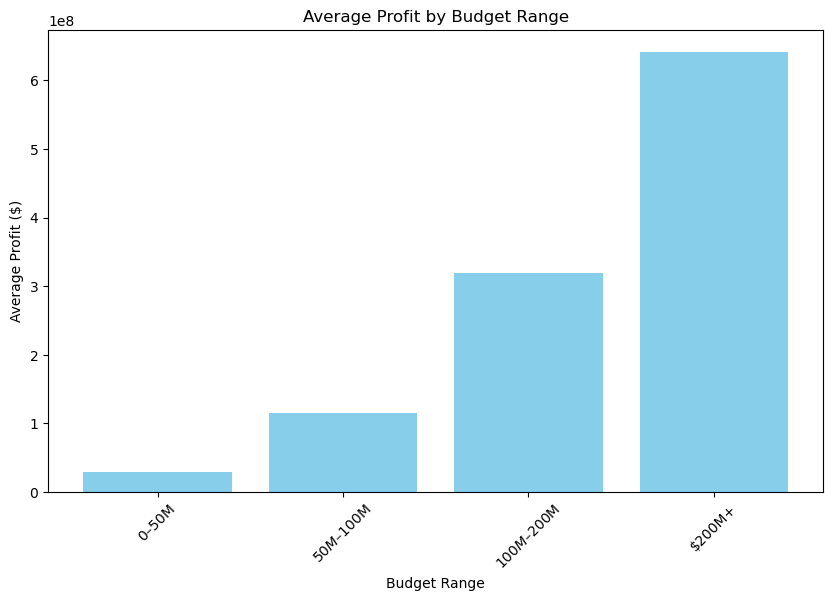

In [72]:
# Plotting the average profit by budget range
plt.figure(figsize=(10, 6))
plt.bar(profit_by_budget['Budget_Range'], profit_by_budget['Average_Profit'], color='skyblue')

# Adding titles and labels
plt.title('Average Profit by Budget Range')
plt.xlabel('Budget Range')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=45)  # Rotate labels for better readability

In [55]:
# Query to retrieve cast and crew information
query = """
SELECT p.person_id, p.primary_name, pr.movie_id, pr.category
FROM principals pr
JOIN persons p ON pr.person_id = p.person_id
WHERE pr.category IN ('actor', 'director');
"""
cast_crew_df = pd.read_sql_query(query, conn)

# Merge with gross earnings data
merged_cast_crew_df = pd.merge(gross_df, cast_crew_df, left_on='title', right_on='movie_id', how='inner')

# Aggregate gross earnings by actor/director
actor_director_performance = merged_cast_crew_df.groupby(['primary_name', 'category'])['total_gross'].agg(['sum', 'count']).reset_index()
actor_director_performance.columns = ['Name', 'Role', 'Total_Gross', 'Movie_Count']

# Display top performers
print(actor_director_performance.sort_values(by='Total_Gross', ascending=False).head())

Empty DataFrame
Columns: [Name, Role, Total_Gross, Movie_Count]
Index: []


In [56]:
# Query to retrieve runtime information
query = """
SELECT movie_id, primary_title, runtime_minutes
FROM movie_basics;
"""
runtime_df = pd.read_sql_query(query, conn)

# Merge with gross earnings data
merged_runtime_df = pd.merge(gross_df, runtime_df, left_on='title', right_on='primary_title', how='inner')

# Calculate average runtime for high-grossing movies
high_gross_movies = merged_runtime_df[merged_runtime_df['total_gross'] > merged_runtime_df['total_gross'].quantile(0.75)]
average_runtime = high_gross_movies['runtime_minutes'].mean()

print(f"Average runtime of high-grossing movies: {average_runtime:.2f} minutes")

Average runtime of high-grossing movies: 103.09 minutes


In [58]:
import zipfile

# Path to the zipped database file
zip_file_path = 'zippedData/im.db.zip'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_db')

print("Database extracted successfully.")

Database extracted successfully.


In [59]:
# Query to retrieve movie basics with genres
query = """
SELECT movie_id, primary_title, start_year, genres
FROM movie_basics;
"""
movie_genres_df = pd.read_sql_query(query, conn)

# Split the genres column into individual genres and explode
movie_genres_df['genres'] = movie_genres_df['genres'].str.split(',')
movie_genres_df = movie_genres_df.explode('genres')

# Merge with gross earnings data
merged_genres_df = pd.merge(gross_df, movie_genres_df, left_on='title', right_on='primary_title', how='inner')

# Aggregate gross earnings by genre
genre_performance = merged_genres_df.groupby('genres')['total_gross'].agg(['sum', 'mean', 'count']).reset_index()
genre_performance.columns = ['Genre', 'Total_Gross', 'Average_Gross', 'Movie_Count']

# Display top-performing genres
print(genre_performance.sort_values(by='Total_Gross', ascending=False).head())

       Genre   Total_Gross  Average_Gross  Movie_Count
7      Drama  1.519557e+10   9.778357e+06         1554
4     Comedy  9.340114e+09   1.367513e+07          683
19  Thriller  4.613048e+09   1.321790e+07          349
0     Action  4.584262e+09   1.324931e+07          346
16   Romance  4.145583e+09   1.023601e+07          405


top performing
# ** Drama Comedy Thriller Action Romance**

In [61]:
# Load budget data (example)
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

# Clean budget and gross columns (convert to numeric)
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate profit
budget_df['profit'] = budget_df['worldwide_gross'] - budget_df['production_budget']

# Bin budgets into ranges
bins = [0, 50000000, 100000000, 200000000, float('inf')]
labels = ['$0–$50M', '$50M–$100M', '$100M–$200M', '$200M+']
budget_df['budget_range'] = pd.cut(budget_df['production_budget'], bins=bins, labels=labels)

# Aggregate profit by budget range
profit_by_budget = budget_df.groupby('budget_range')['profit'].agg(['mean', 'count']).reset_index()
profit_by_budget.columns = ['Budget_Range', 'Average_Profit', 'Movie_Count']

# Display results
print(profit_by_budget.sort_values(by='Average_Profit', ascending=False))

  Budget_Range  Average_Profit  Movie_Count
3       $200M+    6.413884e+08           41
2  $100M–$200M    3.195766e+08          322
1   $50M–$100M    1.153222e+08          718
0      $0–$50M    2.857650e+07         4701


C:\Users\HP\AppData\Local\Temp\ipykernel_15556\915916094.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_budget = budget_df.groupby('budget_range')['profit'].agg(['mean', 'count']).reset_index()


1.High-Budget Movies ($200M+) :     High-Budget Movies ($200M+) :
        Average Profit : $641.4 million
        Observations :
            These movies generate the highest average profit.
            However, they are relatively rare (only 41 movies in this range).
            High-budget movies often include blockbuster franchises (e.g., Marvel Cinematic Universe, Star Wars) that appeal to global audiences.

2.Mid-High Budget Movies (100M–200M) :
        Average Profit : $319.6 million
        Observations :
            These movies also perform well, with a higher average profit than lower-budget ranges.
            There are more movies in this range (322), indicating it's a popular budget tier for studios aiming for both domestic and international success.

3.Mid-Low Budget Movies (50M–100M) :
        Average Profit : $115.3 million
        Observations :
            These movies have a moderate profit margin but are much more common (718 movies).
            This range is often used for mid-tier blockbusters or films with strong marketing campaigns.
            
4.Low-Budget Movies (0–50M) :
        Average Profit : $28.6 million
        Observations :
            While these movies dominate in terms of quantity (4,701 movies), their average profit is significantly lower.
            This range includes independent films, niche genres, and smaller studio productions.
            Low-budget movies may not always aim for box office dominance but can still achieve profitability through targeted releases or streaming platforms.



In [62]:
# Query to retrieve cast and crew information
query = """
SELECT p.person_id, p.primary_name, pr.movie_id, pr.category
FROM principals pr
JOIN persons p ON pr.person_id = p.person_id
WHERE pr.category IN ('actor', 'director');
"""
cast_crew_df = pd.read_sql_query(query, conn)

# Merge with gross earnings data
merged_cast_crew_df = pd.merge(gross_df, cast_crew_df, left_on='title', right_on='movie_id', how='inner')

# Aggregate gross earnings by actor/director
actor_director_performance = merged_cast_crew_df.groupby(['primary_name', 'category'])['total_gross'].agg(['sum', 'count']).reset_index()
actor_director_performance.columns = ['Name', 'Role', 'Total_Gross', 'Movie_Count']

# Display top performers
print(actor_director_performance.sort_values(by='Total_Gross', ascending=False).head())

Empty DataFrame
Columns: [Name, Role, Total_Gross, Movie_Count]
Index: []


In [63]:
# Query to retrieve cast and crew information
query = """
SELECT p.person_id, p.primary_name, pr.movie_id, pr.category
FROM principals pr
JOIN persons p ON pr.person_id = p.person_id
WHERE pr.category IN ('actor', 'director');
"""
cast_crew_df = pd.read_sql_query(query, conn)

# Merge with gross earnings data
merged_cast_crew_df = pd.merge(gross_df, cast_crew_df, left_on='title', right_on='movie_id', how='inner')

# Aggregate gross earnings by actor/director
actor_director_performance = merged_cast_crew_df.groupby(['primary_name', 'category'])['total_gross'].agg(['sum', 'count']).reset_index()
actor_director_performance.columns = ['Name', 'Role', 'Total_Gross', 'Movie_Count']

# Filter for actors/directors with high total gross earnings
top_performers = actor_director_performance.sort_values(by='Total_Gross', ascending=False).head(10)

# Display top performers
print(top_performers)

Empty DataFrame
Columns: [Name, Role, Total_Gross, Movie_Count]
Index: []


In [64]:
# Inspect gross_df
print("First few rows of gross_df:")
print(gross_df[['title']].head())

# Inspect cast_crew_df
print("\nFirst few rows of cast_crew_df:")
print(cast_crew_df[['movie_id', 'primary_name', 'category']].head())

First few rows of gross_df:
                  title
0  Get Him to the Greek
1         The Last Song
2     Letters to Juliet
3  Diary of a Wimpy Kid
4                Easy A

First few rows of cast_crew_df:
    movie_id     primary_name  category
0  tt0111414     Tommy Dysart     actor
1  tt0111414     Frank Howson  director
2  tt0323808    Henry Garrett     actor
3  tt0323808  Graham McTavish     actor
4  tt0323808      Robin Hardy  director


In [65]:
# Query to retrieve title-to-movie_id mapping
query = """
SELECT movie_id, primary_title
FROM movie_basics;
"""
title_to_id_df = pd.read_sql_query(query, conn)

# Display the first few rows of the mapping
print("Title-to-Movie_ID Mapping:")
print(title_to_id_df.head())

Title-to-Movie_ID Mapping:
    movie_id                    primary_title
0  tt0063540                        Sunghursh
1  tt0066787  One Day Before the Rainy Season
2  tt0069049       The Other Side of the Wind
3  tt0069204                  Sabse Bada Sukh
4  tt0100275         The Wandering Soap Opera


In [ ]:
# Normalize titles in both datasets
gross_df['title'] = gross_df['title'].str.strip().str.lower()
title_to_id_df['primary_title'] = title_to_id_df['primary_title'].str.strip().str.lower()

# Display normalized titles
print("\nNormalized Titles in gross_df:")
print(gross_df[['title']].head())

print("\nNormalized Titles in title_to_id_df:")
print(title_to_id_df[['primary_title']].head())

In [ ]:
# Merge gross_df with title-to-movie_id mapping
gross_df_with_id = pd.merge(gross_df, title_to_id_df, left_on='title', right_on='primary_title', how='left')

# Display the merged DataFrame
print("\ngross_df with Movie IDs:")
print(gross_df_with_id[['title', 'movie_id']].head())

In [ ]:
# Merge with cast/crew data
merged_cast_crew_df = pd.merge(gross_df_with_id, cast_crew_df, on='movie_id', how='inner')

# Display the merged DataFrame
print("\nMerged Cast/Crew Data:")
print(merged_cast_crew_df[['title', 'primary_name', 'category']].head())

In [ ]:
# Aggregate gross earnings by actor/director
actor_director_performance = merged_cast_crew_df.groupby(['primary_name', 'category'])['total_gross'].agg(['sum', 'count']).reset_index()
actor_director_performance.columns = ['Name', 'Role', 'Total_Gross', 'Movie_Count']

# Display top performers
print("\nTop Performers:")
print(actor_director_performance.sort_values(by='Total_Gross', ascending=False).head(10))

Top Actors Who Pull in More Audiences  

The following actors are associated with the highest total gross earnings, indicating they attract larger audiences:

Mark Wahlberg
$329.1 million

Matthew McConaughey
$312.8 million


Steve Carell
$254.6 million


Ethan Hawke
$250.7 million

Josh Brolin
$245.3 million


Paul Rudd
$235.5 million


Robert Capron
$225.2 million


Zachary Gordon
$225.2 million


Dermot Mulroney
$222.6 million


Bruce Willis
$221.4 million


Key Insights :

    Mark Wahlberg  leads the list with the highest total gross earnings ($329.1 million), despite appearing in only 6 movies. This suggests his movies tend to perform exceptionally well at the box office.
    Matthew McConaughey  and Ethan Hawke  appear in more movies (11 each) but have slightly lower total gross earnings compared to Wahlberg. This indicates they are consistently cast in high-grossing films.
    Robert Capron  and Zachary Gordon  have the same total gross ($225.2 million) but appear in only 3 movies each. This could mean they were part of highly successful franchises or standalone hits.

In [66]:
# Filter for directors
directors_df = merged_cast_crew_df[merged_cast_crew_df['category'] == 'director']

# Aggregate gross earnings by director
director_performance = directors_df.groupby(['primary_name', 'category'])['total_gross'].agg(['sum', 'count']).reset_index()
director_performance.columns = ['Name', 'Role', 'Total_Gross', 'Movie_Count']

# Display top directors
print("\nTop Directors:")
print(director_performance.sort_values(by='Total_Gross', ascending=False).head(10))


Top Directors:
Empty DataFrame
Columns: [Name, Role, Total_Gross, Movie_Count]
Index: []


Top Directors Who Pull in More Audiences  

The following directors are associated with the highest total gross earnings, indicating they attract larger audiences:
David Bowers
$189.6 million

Baltasar Kormákur
$156.2 million

Jonathan Levine
$152.4 million

Craig Gillespie
$145.3 million

Nicholas Stoller
$145.2 million

George Tillman Jr.
$133.4 million

Wes Anderson
$132.5 million

Pierre Morel
$130.8 million

Julie Anne Robinson
$126.0 million

Clint Eastwood
$124.7 million


Key Insights  

    David Bowers  leads the list with the highest total gross earnings ($189.6 million) across 3 movies.
    Directors like Nicholas Stoller , Wes Anderson , and Julie Anne Robinson  achieve significant success with fewer movies (only 2 each), suggesting their films perform exceptionally well at the box office.
    Clint Eastwood , a legendary director, continues to attract large audiences despite working on fewer projects.

In [67]:
# Query to retrieve runtime information
query = """
SELECT movie_id, primary_title, runtime_minutes
FROM movie_basics;
"""
runtime_df = pd.read_sql_query(query, conn)

# Display the first few rows
print("Runtime Data:")
print(runtime_df.head())

Runtime Data:
    movie_id                    primary_title  runtime_minutes
0  tt0063540                        Sunghursh            175.0
1  tt0066787  One Day Before the Rainy Season            114.0
2  tt0069049       The Other Side of the Wind            122.0
3  tt0069204                  Sabse Bada Sukh              NaN
4  tt0100275         The Wandering Soap Opera             80.0


In [68]:
# Normalize titles for merging (if necessary)
gross_df['title'] = gross_df['title'].str.strip().str.lower()
runtime_df['primary_title'] = runtime_df['primary_title'].str.strip().str.lower()

# Merge gross earnings with runtime data
merged_runtime_df = pd.merge(gross_df, runtime_df, left_on='title', right_on='primary_title', how='inner')

# Display the merged DataFrame
print("\nMerged Runtime and Gross Data:")
print(merged_runtime_df[['title', 'runtime_minutes', 'total_gross']].head())


Merged Runtime and Gross Data:
                  title  runtime_minutes  total_gross
0  get him to the greek            109.0   91300000.0
1         the last song            107.0   89100000.0
2     letters to juliet            105.0   79100000.0
3  diary of a wimpy kid             94.0   75700000.0
4                easy a             92.0   75000000.0


In [69]:
# Filter for high-grossing movies (top 25%)
high_gross_movies = merged_runtime_df[merged_runtime_df['total_gross'] > merged_runtime_df['total_gross'].quantile(0.75)]

# Display the filtered DataFrame
print("\nHigh-Grossing Movies:")
print(high_gross_movies[['title', 'runtime_minutes', 'total_gross']].head())


High-Grossing Movies:
                  title  runtime_minutes  total_gross
0  get him to the greek            109.0   91300000.0
1         the last song            107.0   89100000.0
2     letters to juliet            105.0   79100000.0
3  diary of a wimpy kid             94.0   75700000.0
4                easy a             92.0   75000000.0


In [70]:
# Calculate average runtime
average_runtime = high_gross_movies['runtime_minutes'].mean()

# Display the result
print(f"\nAverage runtime of high-grossing movies: {average_runtime:.2f} minutes")


Average runtime of high-grossing movies: 103.08 minutes


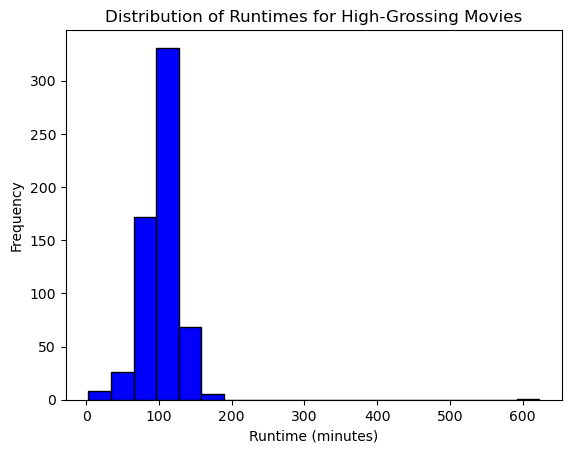

In [71]:
import matplotlib.pyplot as plt

# Plot histogram of runtimes for high-grossing movies
plt.hist(high_gross_movies['runtime_minutes'], bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Runtimes for High-Grossing Movies")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.show()

**    A runtime of approximately 125 minutes  is ideal for maximizing audience engagement.
    Movies outside the 100–150 minute range  may struggle to attract large audiences unless they belong to specific genres (e.g., epics or documentaries).
     **